<a href="https://colab.research.google.com/github/molemale/MachineLearning-Stage-2/blob/master/Stage_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Machine Learning***

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Extending the number of viewable columns

pd.options.display.max_columns = 30

In [ ]:
# Loading the dataset
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv" )
df.head()

In [ ]:
# Dataset info
df.info()

In [ ]:
# Checking if there are missing values in the datset
df.isnull().sum()

In [ ]:
# Data summary (descriptive statisics)
df.describe()

In [ ]:
print(f'The number of rows is the dataset is {df.shape[0]} \nThe number of columns in the dataset is {df.shape[1]}')

In [ ]:
# lets visualize the histogram of all the features to understand the  distribution
df.hist(bins=20, figsize=(20,20));

In [9]:
# Dropping the lights column
df.drop(['lights'], axis=1,inplace=True)

# Dropping the date column because its not part of the problem
df.drop(['date'], axis=1, inplace=True)

In [ ]:
# Displots for RH_6 , RH_out , Visibility , Windspeed  will be in focus, data not regular
import matplotlib.pyplot as plt 
# Had to import this again, wondering why?
fig, ax = plt.subplots(2,2,figsize=(12,8))
ax1 = sns.distplot(df["RH_6"],  bins=10, ax= ax[0][0])
ax2 = sns.distplot(df["RH_out"],bins=10, ax=ax[0][1])
ax3 = sns.distplot(df["Visibility"],bins=10, ax=ax[1][0])
ax4 = sns.distplot(df["Windspeed"],bins=10, ax=ax[1][1])

In [ ]:
# For the appliance, we can look at the column here

df['Appliances'].hist(bins = 100, figsize=(10,5))
plt.xlabel('Appliance energy consumption in wh', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large');

In [ ]:
# Calculating the percentage of appliance enegry consumption less than 200 wh

print(f" Percentage of the appliance energy consumption less than 200 Wh is: {round((df[df['Appliances'] <= 200]['Appliances'].count()) / len(df['Appliances']) * 100, 2)}%")

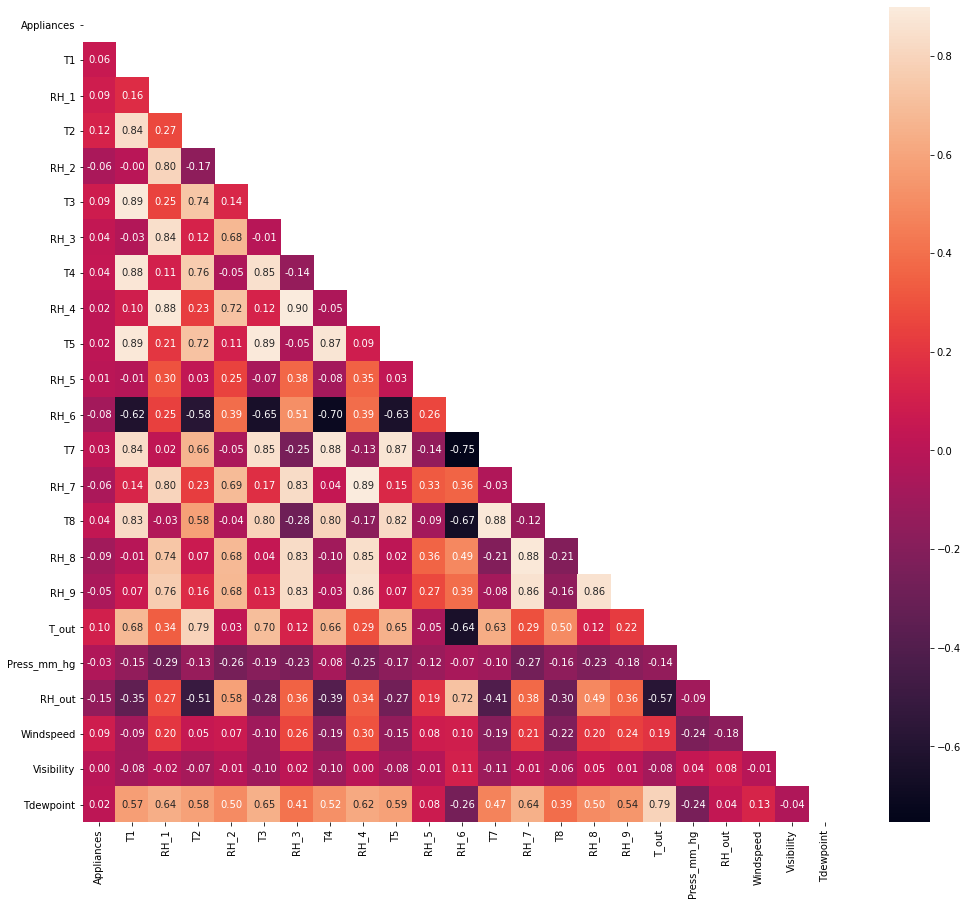

In [33]:
# Using weather , temperature , applainces and random column to see the correlation
import numpy as np
corr = df.corr()

# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
fig = plt.figure(figsize=(17, 15))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask);

In [37]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Getting correlations 

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 40))

Top Absolute Correlations
RH_3   RH_4         0.898978
RH_4   RH_7         0.894301
T1     T3           0.892402
T3     T5           0.888169
T1     T5           0.885247
RH_7   RH_8         0.883984
T7     T8           0.882123
RH_1   RH_4         0.880359
T4     T7           0.877763
T1     T4           0.877001
T4     T5           0.871813
T5     T7           0.870624
RH_7   RH_9         0.858686
RH_4   RH_9         0.856591
RH_8   RH_9         0.855812
T3     T4           0.852778
       T7           0.847374
RH_4   RH_8         0.847259
RH_1   RH_3         0.844677
T1     T7           0.838705
       T2           0.836834
RH_3   RH_9         0.833538
       RH_7         0.832685
       RH_8         0.828822
T1     T8           0.825413
T5     T8           0.824981
RH_1   RH_7         0.801122
       RH_2         0.797535
T4     T8           0.796256
T3     T8           0.795283
T2     T_out        0.792255
T_out  Tdewpoint    0.790661
RH_1   RH_9         0.764001
T2     T4        

In [ ]:
# lets see how each features correlates with the target column
cor_matrix = df.corr()
cor_matrix['Appliances']

In [ ]:
df.drop(['T9', 'T6', 'rv1', 'rv2'], axis=1, inplace=True) #stalked here!

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Normalizing the features
normalized_features = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [39]:
# Splitting data (independent) and (dependent) variables

# Predictors
features = normalized_features.drop(['Appliances'], axis=1)

# target variable
target = normalized_features['Appliances']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [ ]:
print(f'shape of training set is {X_train.shape}')
print(f'shape of testing set is {X_test.shape}')

In [ ]:
# Importing Library
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# create a dictionary of different algorithms 
models = {'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet':ElasticNet(),
        'LinearRegression':LinearRegression(),
        'KNeighborsRegressor':KNeighborsRegressor(),
        'RandomForestRegressor':RandomForestRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor()}

In [49]:
# helper funtion to compute the score, RMSE, time on the training and testing set

def pipeline(models, X_train, X_test, y_train, y_test):
    """
    This function iteratively goes through all the models defined in the dictionary and 
    computes the Train_score, Test_score, MSE, MAE and RMSE.
    
    Parameters: model, training set(X_train), test_set(X_test), train_labels(y_train), and test_labels(y_test).
    
    Returns: This funtion returns a dataFrame containing calculations of each models and also plots bar
            chart showing how each models performs.
    """
    
    # store properties of each model
    prop = []
    
    # loop through the dictionary of models
    for reg_name, regressor in models.items():
        # empty dict for storing properties of each models
        reg_dict = {}
        # store the name of each model
        reg_dict['Name'] = reg_name
        # fit the regressor model
        regressor.fit(X_train, y_train)
        # compute the Train_score
        reg_dict['Train_score'] = regressor.score(X_train, y_train)
        # compute the test scores
        reg_dict['Test_score'] = regressor.score(X_test, y_test)
        # compute the mean_absolute_error
        reg_dict['MAE'] = mean_absolute_error(y_test, regressor.predict(X_test))
        #compute the mean_squared_error
        reg_dict['MSE'] = mean_squared_error(y_test, regressor.predict(X_test))
        # compute the RMSE
        reg_dict['RMSE'] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
        # append the properties of a single regressor to the prop list
        prop.append(reg_dict)
     
    # create a dataframe with a list of all the model properties
    summary_df = pd.DataFrame(prop)
    
    # plot a bar chart to visualize the performance of each model
    summary_df.plot(x='Name', y=['Train_score', 'Test_score', 'MAE', 'MSE', 'RMSE'], kind='bar', figsize=(15,10),
               title='Performance scores of different models')
        
        
    return summary_df

In [48]:
# Importing Library
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# create a dictionary of different algorithms 
models = {'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet':ElasticNet(),
        'LinearRegression':LinearRegression(),
        'KNeighborsRegressor':KNeighborsRegressor(),
        'RandomForestRegressor':RandomForestRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor()}
# execute the function
pipeline(models, X_train, X_test, y_train, y_test)